In [ ]:
# solution day 1

In [161]:
import pandas as pd
import numpy as np
import random

In [253]:
df = pd.read_csv('Hotel-A-train.csv')
validation_df = pd.read_csv('Hotel-A-validation.csv')

test_df = pd.read_csv('Hotel-A-test.csv')

In [254]:
df.head(4)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

In [256]:
df.shape

(27499, 24)

In [257]:
df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

## pre-processing

In [258]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

## for the train set
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Educational_Level'] = label_encoder.fit_transform(df['Educational_Level'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Country_region'] = label_encoder.fit_transform(df['Country_region'])
df['Hotel_Type'] = label_encoder.fit_transform(df['Hotel_Type'])
df['Meal_Type'] = label_encoder.fit_transform(df['Meal_Type'])
df['Visted_Previously'] = label_encoder.fit_transform(df['Visted_Previously'])
df['Previous_Cancellations'] = label_encoder.fit_transform(df['Previous_Cancellations'])
df['Deposit_type'] = label_encoder.fit_transform(df['Deposit_type'])
df['Booking_channel'] = label_encoder.fit_transform(df['Booking_channel'])
df['Required_Car_Parking'] = label_encoder.fit_transform(df['Required_Car_Parking'])
df['Use_Promotion'] = label_encoder.fit_transform(df['Use_Promotion'])
df['Income'] = label_encoder.fit_transform(df['Income'])

## for the validation set
validation_df['Ethnicity'] = label_encoder.fit_transform(validation_df['Ethnicity'])
validation_df['Educational_Level'] = label_encoder.fit_transform(validation_df['Educational_Level'])
validation_df['Gender'] = label_encoder.fit_transform(validation_df['Gender'])
validation_df['Country_region'] = label_encoder.fit_transform(validation_df['Country_region'])
validation_df['Hotel_Type'] = label_encoder.fit_transform(validation_df['Hotel_Type'])
validation_df['Meal_Type'] = label_encoder.fit_transform(validation_df['Meal_Type'])
validation_df['Visted_Previously'] = label_encoder.fit_transform(validation_df['Visted_Previously'])
validation_df['Previous_Cancellations'] = label_encoder.fit_transform(validation_df['Previous_Cancellations'])
validation_df['Deposit_type'] = label_encoder.fit_transform(validation_df['Deposit_type'])
validation_df['Booking_channel'] = label_encoder.fit_transform(validation_df['Booking_channel'])
validation_df['Required_Car_Parking'] = label_encoder.fit_transform(validation_df['Required_Car_Parking'])
validation_df['Use_Promotion'] = label_encoder.fit_transform(validation_df['Use_Promotion'])
validation_df['Income'] = label_encoder.fit_transform(validation_df['Income'])

## for the test set
test_df['Ethnicity'] = label_encoder.fit_transform(test_df['Ethnicity'])
test_df['Educational_Level'] = label_encoder.fit_transform(test_df['Educational_Level'])
test_df['Gender'] = label_encoder.fit_transform(test_df['Gender'])
test_df['Country_region'] = label_encoder.fit_transform(test_df['Country_region'])
test_df['Hotel_Type'] = label_encoder.fit_transform(test_df['Hotel_Type'])
test_df['Meal_Type'] = label_encoder.fit_transform(test_df['Meal_Type'])
test_df['Visted_Previously'] = label_encoder.fit_transform(test_df['Visted_Previously'])
test_df['Previous_Cancellations'] = label_encoder.fit_transform(test_df['Previous_Cancellations'])
test_df['Deposit_type'] = label_encoder.fit_transform(test_df['Deposit_type'])
test_df['Booking_channel'] = label_encoder.fit_transform(test_df['Booking_channel'])
test_df['Required_Car_Parking'] = label_encoder.fit_transform(test_df['Required_Car_Parking'])
test_df['Use_Promotion'] = label_encoder.fit_transform(test_df['Use_Promotion'])
test_df['Income'] = label_encoder.fit_transform(test_df['Income'])

In [259]:
df.dtypes

Reservation-id             int64
Gender                     int64
Age                        int64
Ethnicity                  int64
Educational_Level          int64
Income                     int64
Country_region             int64
Hotel_Type                 int64
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                  int64
Visted_Previously          int64
Previous_Cancellations     int64
Deposit_type               int64
Booking_channel            int64
Required_Car_Parking       int64
Reservation_Status        object
Use_Promotion              int64
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [260]:
## for the train set
df['Reservation-id'] = df['Reservation-id'].astype('object')
df['Gender'] = df['Gender'].astype('object')
df['Ethnicity'] = df['Ethnicity'].astype('object')
df['Educational_Level'] = df['Educational_Level'].astype('object')
df['Income'] = df['Income'].astype('object')
df['Country_region'] = df['Country_region'].astype('object')
df['Hotel_Type'] = df['Hotel_Type'].astype('object')
df['Meal_Type'] = df['Meal_Type'].astype('object')
df['Visted_Previously'] = df['Visted_Previously'].astype('object')
df['Previous_Cancellations'] = df['Previous_Cancellations'].astype('object')
df['Deposit_type'] = df['Deposit_type'].astype('object')
df['Booking_channel'] = df['Booking_channel'].astype('object')
df['Required_Car_Parking'] = df['Required_Car_Parking'].astype('object')
df['Use_Promotion'] = df['Use_Promotion'].astype('object')

## for the validation set
validation_df['Reservation-id'] = validation_df['Reservation-id'].astype('object')
validation_df['Gender'] = validation_df['Gender'].astype('object')
validation_df['Ethnicity'] = validation_df['Ethnicity'].astype('object')
validation_df['Educational_Level'] = validation_df['Educational_Level'].astype('object')
validation_df['Income'] = validation_df['Income'].astype('object')
validation_df['Country_region'] = validation_df['Country_region'].astype('object')
validation_df['Hotel_Type'] = validation_df['Hotel_Type'].astype('object')
validation_df['Meal_Type'] = validation_df['Meal_Type'].astype('object')
validation_df['Visted_Previously'] = validation_df['Visted_Previously'].astype('object')
validation_df['Previous_Cancellations'] = validation_df['Previous_Cancellations'].astype('object')
validation_df['Deposit_type'] = validation_df['Deposit_type'].astype('object')
validation_df['Booking_channel'] = validation_df['Booking_channel'].astype('object')
validation_df['Required_Car_Parking'] = validation_df['Required_Car_Parking'].astype('object')
validation_df['Use_Promotion'] = validation_df['Use_Promotion'].astype('object')

## for the test set
test_df['Reservation-id'] = test_df['Reservation-id'].astype('object')
test_df['Gender'] = test_df['Gender'].astype('object')
test_df['Ethnicity'] = test_df['Ethnicity'].astype('object')
test_df['Educational_Level'] = test_df['Educational_Level'].astype('object')
test_df['Income'] = test_df['Income'].astype('object')
test_df['Country_region'] = test_df['Country_region'].astype('object')
test_df['Hotel_Type'] = test_df['Hotel_Type'].astype('object')
test_df['Meal_Type'] = df['Meal_Type'].astype('object')
test_df['Visted_Previously'] = test_df['Visted_Previously'].astype('object')
test_df['Previous_Cancellations'] = test_df['Previous_Cancellations'].astype('object')
test_df['Deposit_type'] = test_df['Deposit_type'].astype('object')
test_df['Booking_channel'] = test_df['Booking_channel'].astype('object')
test_df['Required_Car_Parking'] = test_df['Required_Car_Parking'].astype('object')
test_df['Use_Promotion'] = test_df['Use_Promotion'].astype('object')

In [261]:
from datetime import date
initial_date=date(2010, 1, 1)

def modify_date(dataframe, col):
    for row in range(dataframe.shape[0]):
        date_str = dataframe[col][row]
        date_arr = ([int(x) for x in date_str.split("/")] )
        date_diff = (date(date_arr[2], date_arr[0], date_arr[1])-initial_date).days
        dataframe[col][row] = date_diff // 5000

        
        
# for train set
modify_date(df, 'Booking_date')
modify_date(df, 'Expected_checkin')
modify_date(df, 'Expected_checkout')
# for validation set
modify_date(validation_df, 'Booking_date')
modify_date(validation_df, 'Expected_checkin')
modify_date(validation_df, 'Expected_checkout')
# for test set
modify_date(test_df, 'Booking_date')
modify_date(test_df, 'Expected_checkin')
modify_date(test_df, 'Expected_checkout')

/home/rusiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Output modification

In [262]:
def output_modification(dataframe, output):
    val = 0
    for row in range(dataframe.shape[0]):
        if dataframe[output][row] == "Check-In":
            val = 1
        elif dataframe[output][row] == "Canceled":
            val = 2
        elif dataframe[output][row] == "No-Show":
            val = 3
        else:
            print(dataframe[output][row])
            print("Something went wrong! Don't proceed!")
            break
        dataframe[output][row] = val

        
        
# for train set
output_modification(df, 'Reservation_Status')
# for validation set
output_modification(validation_df, 'Reservation_Status')

/home/rusiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [263]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in df['Reservation_Status']:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  21240
No. of Twos     :  4134
No. of Threes   :  2125
No. of Unwanted :  0


In [264]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,0,40,2,1,2,1,1,0,0,...,0,0,0,0,2,1,1,1,10,218
1,77491756,0,49,2,3,1,0,1,0,0,...,0,0,0,2,2,1,1,0,0,185
2,73747291,0,42,3,1,2,0,1,0,0,...,0,0,0,0,2,1,1,0,0,119


In [265]:
import pandas as pd

temp_df = []
for row in df.itertuples(index=False):
    if row.Reservation_Status == 2:
        temp_df.extend([list(row)]*5)
    elif row.Reservation_Status == 3:
        temp_df.extend([list(row)]*8)
    else:
        temp_df.append(list(row))

df = pd.DataFrame(temp_df, columns=df.columns)
df = df.sample(frac=1)

In [266]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in df['Reservation_Status']:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  21240
No. of Twos     :  20670
No. of Threes   :  17000
No. of Unwanted :  0


In [267]:
df.describe()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
count,5.891000e+04,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.0,58910.0,...,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000,58910.000000
mean,5.032075e+07,0.497420,43.992141,1.490952,1.199372,1.280462,1.593804,1.004091,0.0,0.0,...,0.889102,0.329469,0.111730,0.575641,1.422831,0.715872,1.928026,0.753251,12.466050,175.288627
std,2.898556e+07,0.499998,15.255105,1.121388,1.167144,1.031200,1.014177,0.817009,0.0,0.0,...,0.853794,0.470024,0.315036,0.858176,0.728558,0.451002,0.802469,0.431123,11.202822,43.876011
min,3.154000e+03,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.000000
25%,2.524568e+07,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.000000,137.000000
50%,5.027317e+07,0.000000,44.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,10.000000,175.000000
75%,7.542865e+07,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,...,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,214.000000
max,9.999900e+07,1.000000,70.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.0,0.0,...,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,40.000000,250.000000


In [268]:
df['Reservation_Status'] = df['Reservation_Status'].astype('int')
validation_df['Reservation_Status'] = validation_df['Reservation_Status'].astype('int')

In [269]:
df.dtypes

Reservation-id            int64
Gender                    int64
Age                       int64
Ethnicity                 int64
Educational_Level         int64
Income                    int64
Country_region            int64
Hotel_Type                int64
Expected_checkin          int64
Expected_checkout         int64
Booking_date              int64
Adults                    int64
Children                  int64
Babies                    int64
Meal_Type                 int64
Visted_Previously         int64
Previous_Cancellations    int64
Deposit_type              int64
Booking_channel           int64
Required_Car_Parking      int64
Reservation_Status        int64
Use_Promotion             int64
Discount_Rate             int64
Room_Rate                 int64
dtype: object

## Feature extraction

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# sns.distplot(df['PAY_JULY'], kde = False, bins=30, color='blue')

In [209]:
# df=df.drop(["Client_ID",'AGE', 'Balance_Limit_V1'], axis =1)

In [210]:
#plt.figure(figsize=(8,6))
#sns.swarmplot(x='Revenue',y='BounceRates',data=df, hue='Weekend')
#plt.show()

<AxesSubplot:>

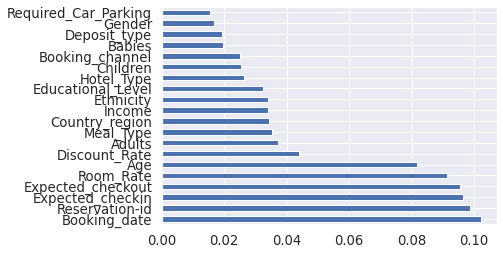

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['Reservation_Status']
model = rf.fit(df.drop('Reservation_Status', axis=1),y)
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('Reservation_Status', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

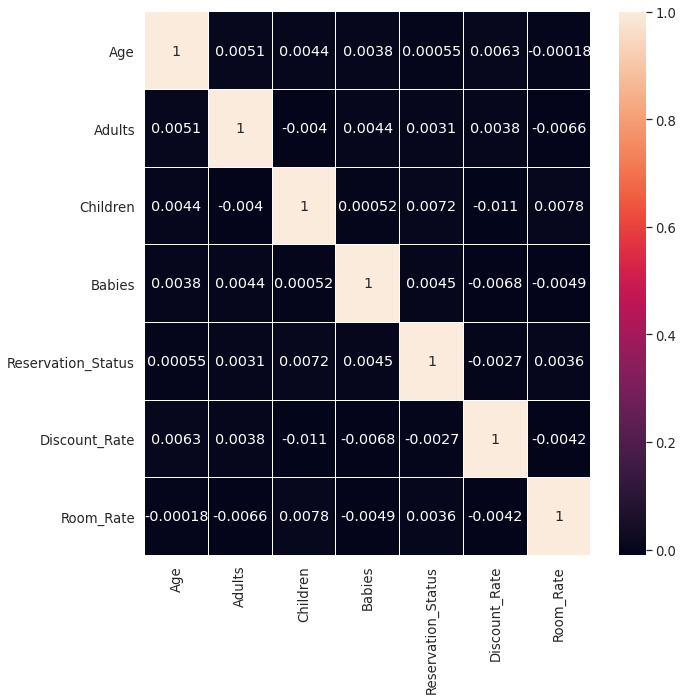

In [136]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [137]:
# prediction_var = ['Homepage','Aboutus','Aboutus_Duration','Contactus_Duration','PageValues','Month','Browser','Province','TrafficType','Weekend']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.drop('NEXT_MONTH_DEFAULT',1), df['NEXT_MONTH_DEFAULT'], test_size =.2, random_state=10)

# X_train = X_train[prediction_var]
# X_test = X_test[prediction_var]

In [270]:
X_test = validation_df.drop(['Reservation_Status'], axis =1)
X_train = df.drop(['Reservation_Status'], axis =1)
 
y_test = validation_df['Reservation_Status']
y_train = df['Reservation_Status'] 


### Classification

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       #['Linear Regression :',LinearRegression()],
       ['Random Forest Classifier :',RandomForestClassifier()],
       ['XGB Classifier :',XGBClassifier()],
       ['SGD Classifier :',SGDClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       #['Support Vector Classification SVC :',SVC(kernel='sigmoid')],
       #['Support Vector Classification SVR :',SVR()],
       #['Cat Boost Classifier :',CatBoostClassifier(iterations=1000)],
       #['Support Vector Classification LinearSVC :',LinearSVC()],
       #['Support Vector Classification LinearSVR :',LinearSVR()],
       #['MLP Classifier :',MLPClassifier()],
       #['Gaussian Process Classifier :',GaussianProcessClassifier()],
       #['RBF Classifier :',RBF()],
       #['GridSearchCV Classifier :',GridSearchCV()],
       ['QuadraticDiscriminantAnalysis :',QuadraticDiscriminantAnalysis()],
       ['Gaussian Naive Bayes :',GaussianNB()]]

In [273]:
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

random.seed(100)
rfmodel = XGBClassifier()

Logistic Regression : 0.5856675154601674
Decision Tree Classification : 0.4739905420152783
Random Forest Classifier : 0.5813022917424518


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Reservation-id, Gender, Ethnicity, Educational_Level, Income, Country_region, Hotel_Type, Expected_checkin, Expected_checkout, Booking_date, Meal_Type, Visted_Previously, Previous_Cancellations, Deposit_type, Booking_channel, Required_Car_Parking, Use_Promotion

## Hyper-parameter tuning 

In [ ]:
'''#Hyperparameter tuning for XGB Classifier
# WARNING!!!....This may take a long time to process according to your processing power.
# if you really need ..uncomment the below and run!
random.seed(100)
from sklearn.model_selection import GridSearchCV
n_estimators = [33,34,35,40,50]
max_depth = [3,4,5,6,10]
learning_rate=[0.1,0.2,0.3] 
min_child_weight=[.7,.8,.9,1,1.1] 
scale_pos_weight=[.7,.8,.9,1] 
base_score=[0.6,0.7,0.8]
hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,base_score=base_score)
h_rfmodel = GridSearchCV(rfmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_rfmodel.fit(X_train,y_train)
print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_logmodel.best_estimator_.get_params()['learning_rate'])
print('Best min_child_weight:', best_logmodel.best_estimator_.get_params()['min_child_weight'])
print('Best scale_pos_weight:', best_logmodel.best_estimator_.get_params()['scale_pos_weight'])
print('Best base_score:', best_logmodel.best_estimator_.get_params()['base_score'])'''

## Validation

In [274]:
# model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=35, verbosity=1, n_jobs=1, gamma=0, min_child_weight=.77, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=.2, scale_pos_weight=.9, base_score=0.7, random_state=0, seed=None, missing=None)
# model = MLPClassifier()
# model = LogisticRegression()
# model = ExtraTreesClassifier()
# model = SVC(kernel='sigmoid')
# model = SGDClassifier()
model = RandomForestClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.5834849036013096


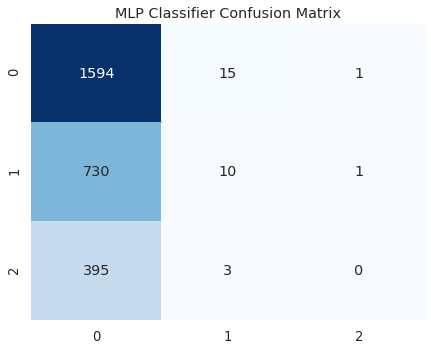

In [275]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,predictions)

plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("MLP Classifier Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## Prediction




In [276]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('NEXT_MONTH_DEFAULT',1), df['NEXT_MONTH_DEFAULT'], test_size =.000001, random_state=10)

# model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=35, verbosity=1, n_jobs=1, gamma=0, min_child_weight=.77, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=.2, scale_pos_weight=.9, base_score=0.7, random_state=0, seed=None, missing=None)
# model = MLPClassifier()
# model = LogisticRegression()
# model = ExtraTreesClassifier()
# model = SVC(kernel='sigmoid')
# model = SGDClassifier()
model = RandomForestClassifier()

model.fit(X_train, y_train)

my_prediction = model.predict(test_df)

# print(my_prediction)
print(len(my_prediction))

for i in my_prediction:
    print(i)

4318
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [277]:
ones, twos, threes, unwanted = 0, 0, 0, 0
for i in my_prediction:
    if(i==1):
        ones +=1
    elif(i==2):
        twos += 1
    elif(i==3):
        threes += 1
    else:
        unwanted += 1
        
print("No. of Ones     : ", ones)
print("No. of Twos     : ", twos)
print("No. of Threes   : ", threes)
print("No. of Unwanted : ", unwanted)

No. of Ones     :  4303
No. of Twos     :  13
No. of Threes   :  2
No. of Unwanted :  0
